In [7]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model


In [8]:
!nvidia-smi

Tue Dec  6 11:54:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    27W /  70W |    312MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#!pip install tensorflow-gpu

In [3]:
device_list = tf.test.gpu_device_name()
print(device_list)

/device:GPU:0


In [4]:
IM_SIZE = 224
CHANNELS = 3

In [ ]:
#! pip install split-folders

In [5]:
#%cd /content/drive/My Drive/Datascience projects

/content/drive/My Drive/Datascience projects


In [9]:
!pwd

/content/drive/MyDrive/Datascience projects


In [ ]:
#! split-folders --output train_val_test_Malaria_cell_images --ratio .6 .2 .2 -- Malaria_cell_images

Copying files: 27560 files [10:54, 42.08 files/s] 


In [10]:

train_gen= ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10
)
train_ds = train_gen.flow_from_directory(
    'train_val_test_Malaria_cell_images/train',
     target_size = (IM_SIZE, IM_SIZE),
     batch_size = 32,
     class_mode = 'categorical'
     #shuffle = True
)


val_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10
)
val_ds = val_gen.flow_from_directory(
    'train_val_test_Malaria_cell_images/val',
     target_size = (IM_SIZE, IM_SIZE),
     batch_size = 32,
     class_mode = 'categorical'
     #shuffle = True
)


test_gen = ImageDataGenerator(
     rescale = 1./255
)
test_ds = test_gen.flow_from_directory(
    'train_val_test_Malaria_cell_images/test',
     target_size = (IM_SIZE, IM_SIZE),
     batch_size = 32,
     class_mode = 'categorical'
)

Found 16534 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [26]:
class_names = train_ds.class_indices
print(class_names)

{'Parasitized': 0, 'Uninfected': 1}


In [27]:
class_names = train_ds.class_indices.keys()
class_names = list(class_names)
print(class_names)

['Parasitized', 'Uninfected']


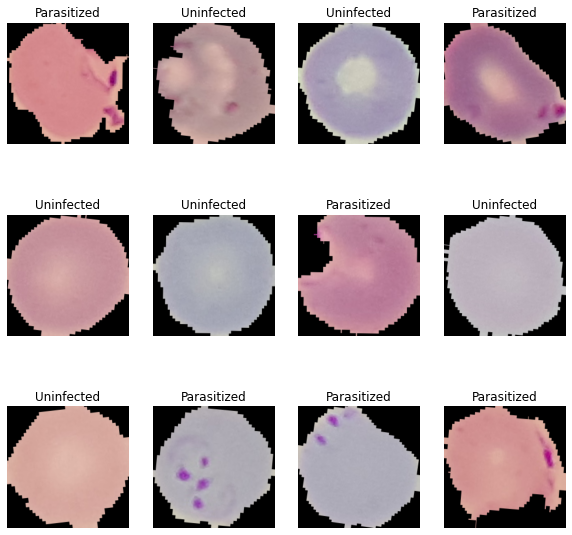

In [ ]:
plt.figure(figsize= (10,10))
for i in range (12):
  image, label = train_ds.next()
  ax = plt.subplot(3,4,i+1)
  #print(image.shape)
  plt.imshow(image[i])
  plt.title(class_names[int(label[i])])
  plt.show
  plt.axis("off")

In [40]:
print(label)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


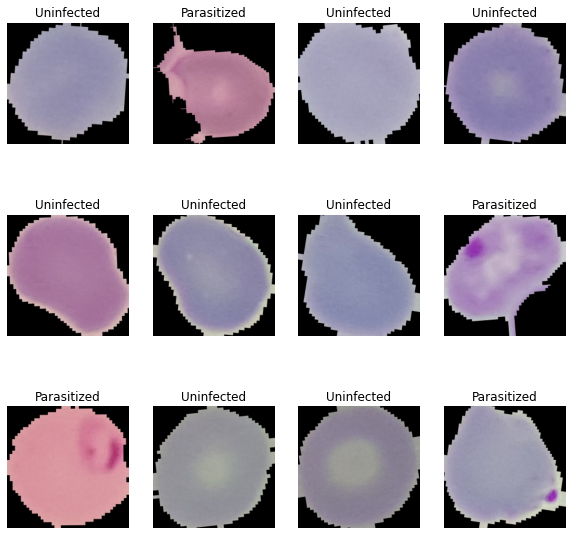

In [45]:
plt.figure(figsize= (10,10))
for i in range (12):
  image, label = train_ds.next()
  ax = plt.subplot(3,4,i+1)
  #print(image.shape)
  plt.imshow(image[i])
  plt.title(class_names[np.argmax(label[i])])
  plt.show
  plt.axis("off")

In [13]:
vgg19 = VGG19(input_shape=[IM_SIZE, IM_SIZE, CHANNELS], weights='imagenet', include_top=False )

80134624/80134624 [==============================] - 0s 0us/step


In [14]:
for layer in vgg19.layers:
  layer.trainable = False

In [15]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
flatten = Flatten()(vgg19.output)

In [17]:
output = Dense(2, activation = 'softmax')(flatten)

In [18]:
model_vgg19 = Model(inputs = vgg19.input, outputs = output)

In [19]:
model_vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
model_vgg19.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'] )

In [21]:
history_model_vgg19 = model_vgg19.fit(train_ds, epochs= 10, validation_data=val_ds)

Epoch 1/10
517/517 [==============================] - 3216s 6s/step - loss: 0.3861 - accuracy: 0.8352 - val_loss: 0.3335 - val_accuracy: 0.8572
Epoch 2/10
517/517 [==============================] - 308s 596ms/step - loss: 0.2733 - accuracy: 0.8915 - val_loss: 0.2262 - val_accuracy: 0.9126
Epoch 3/10
517/517 [==============================] - 312s 604ms/step - loss: 0.2303 - accuracy: 0.9121 - val_loss: 0.2634 - val_accuracy: 0.9019
Epoch 4/10
517/517 [==============================] - 291s 563ms/step - loss: 0.2087 - accuracy: 0.9185 - val_loss: 0.2234 - val_accuracy: 0.9180
Epoch 5/10
517/517 [==============================] - 295s 571ms/step - loss: 0.2042 - accuracy: 0.9247 - val_loss: 0.3111 - val_accuracy: 0.8870
Epoch 6/10
517/517 [==============================] - 315s 609ms/step - loss: 0.1984 - accuracy: 0.9268 - val_loss: 0.2195 - val_accuracy: 0.9224
Epoch 7/10
517/517 [==============================] - 291s 564ms/step - loss: 0.2029 - accuracy: 0.9232 - val_loss: 0.3595 - v

In [22]:
model_vgg19.evaluate(test_ds)

173/173 [==============================] - 1235s 7s/step - loss: 0.3128 - accuracy: 0.8982


[0.3127861022949219, 0.8982220888137817]

In [23]:
acc = history_model_vgg19.history['accuracy']
val_acc = history_model_vgg19.history['val_accuracy']

loss = history_model_vgg19.history['loss']
val_loss = history_model_vgg19.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

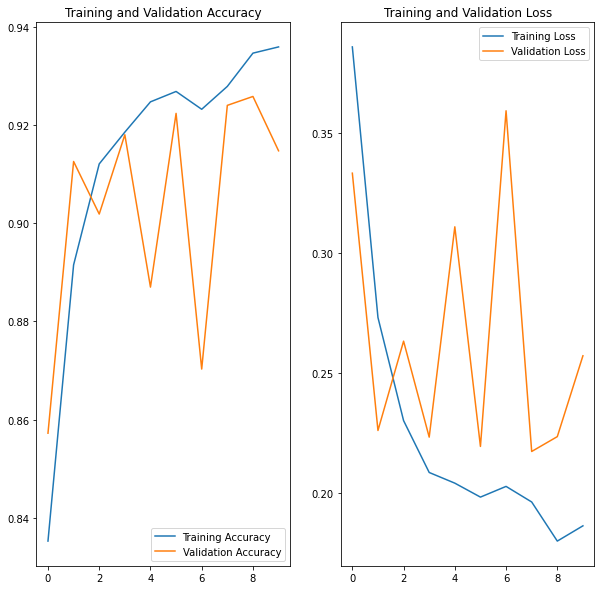

In [24]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.plot(range(10), acc, label = 'Training Accuracy')
plt.plot(range(10), val_acc, label = 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(10), loss, label = 'Training Loss')
plt.plot(range(10), val_loss, label = 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('Training and Validation Loss')


1/1 [==============================] - 0s 28ms/step


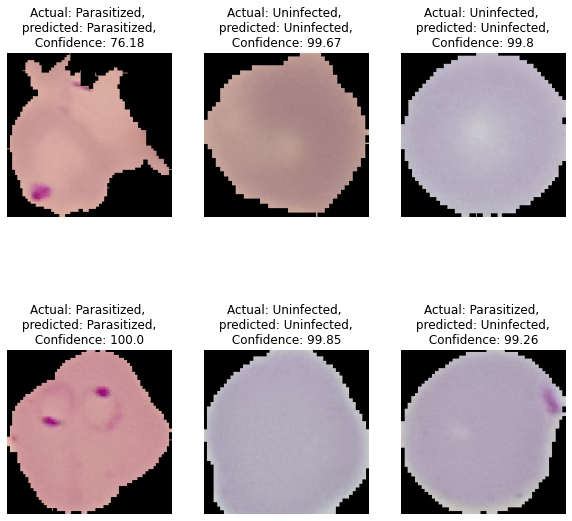

In [49]:
plt.figure(figsize=(10,10))
for images, labels in test_ds:
  for i in range (6):
    ax = plt.subplot(2,3,i+1)
    plt.imshow(images[i])

    #actual_image= class_names[int(labels[i])] 
    actual_image = class_names[np.argmax(labels[i])]
    predictions = model_vgg19.predict(images)
    predicted_image = class_names[np.argmax(predictions[i])] 
    confidence = round(100 * (np.max(predictions[i])), 2)

    plt.title(f"Actual: {actual_image}, \n predicted: {predicted_image}, \n Confidence: {confidence} ")
    plt.axis("off")

  break
